In [1]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 19.6 MB/s eta 0:00:00


In [2]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [3]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
luteo = r'/content/drive/MyDrive/intento_cosas/features_dc_lut.csv'
menstr = r'/content/drive/MyDrive/intento_cosas/features_dc_men.csv'
prolif = r'/content/drive/MyDrive/intento_cosas/features_dc_pro.csv'

Mounted at /content/drive


In [4]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,cortical_mean_4,cortical_mean_5,cortical_mean_6,cortical_mean_11,cortical_mean_12,cortical_mean_13,cortical_mean_21,cortical_mean_31,cortical_std_4,cortical_std_5,...,subcortical_mean_19,subcortical_mean_20,subcortical_std_4,subcortical_std_5,subcortical_std_9,subcortical_std_10,subcortical_std_15,subcortical_std_16,subcortical_std_19,subcortical_std_20
file_name,,,,,,,,,,,,,,,,,,,,,
dc_103515_01.nii.gz,2070.4424,2253.4768,1090.2253,3758.8662,3761.6611,261.85007,5901.8530,1030.5354,0.0,0.0,...,367.237700,906.869000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_103515_02.nii.gz,2867.2603,3160.8315,1658.4710,4343.1064,3998.7874,240.15456,6549.6313,3321.8508,0.0,0.0,...,112.256830,90.190475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_103515_03.nii.gz,3833.5032,3224.6777,1969.0227,2704.3057,4867.4683,455.37402,6622.4795,4801.0327,0.0,0.0,...,189.901640,61.119050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_104820_01.nii.gz,1756.8032,1119.6401,1152.2587,1366.8103,3866.1392,498.87018,5854.4004,7737.4204,0.0,0.0,...,83.005460,73.976190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_104820_02.nii.gz,2453.0164,1847.9617,1290.6572,2165.5347,4244.7256,1076.00160,5673.4410,4997.7930,0.0,0.0,...,98.352460,67.904760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dc_809252_02.nii.gz,1596.6963,2358.6821,1424.8414,2898.7913,3844.2795,183.89644,6534.6914,5416.7295,0.0,0.0,...,61.822403,63.523810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_809252_03.nii.gz,2662.7715,1641.9869,733.2691,6357.9233,4426.7910,436.10046,4774.3228,1366.1467,0.0,0.0,...,94.054640,50.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_822244_01.nii.gz,3544.3635,3116.2168,1438.7532,1728.3215,5634.0350,174.10664,6659.0360,2880.8582,0.0,0.0,...,54.874317,55.309525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,cortical_mean_4,cortical_mean_5,cortical_mean_6,cortical_mean_11,cortical_mean_12,cortical_mean_13,cortical_mean_21,cortical_mean_31,cortical_std_4,cortical_std_5,...,subcortical_mean_19,subcortical_mean_20,subcortical_std_4,subcortical_std_5,subcortical_std_9,subcortical_std_10,subcortical_std_15,subcortical_std_16,subcortical_std_19,subcortical_std_20
file_name,,,,,,,,,,,,,,,,,,,,,
dc_114823_01.nii.gz,2597.78690,2745.48200,1826.5015,1908.8273,2826.76100,320.406500,4168.516000,4116.447300,0.0,0.0,...,560.338800,25.369047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_114823_02.nii.gz,4765.57130,5140.69730,2126.4130,1070.3699,1725.61280,166.953630,6564.422400,5085.315400,0.0,0.0,...,300.098360,29.440475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_114823_03.nii.gz,2418.34280,2554.57740,1590.2275,1734.1410,2013.58480,114.765070,6986.727500,6258.900000,0.0,0.0,...,154.144800,25.869047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_117122_01.nii.gz,1149.41430,1543.07010,2652.4353,2070.3354,2732.70120,884.364750,5212.510300,7778.577000,0.0,0.0,...,2017.065600,946.381000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_117122_02.nii.gz,1922.50500,3054.15300,2957.5588,3478.0027,3651.91110,551.330750,1990.819500,4405.831000,0.0,0.0,...,1961.765000,1413.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dc_861456_02.nii.gz,197.81505,896.49420,3132.2896,1067.9307,1599.52650,37.797527,8024.756300,11783.569000,0.0,0.0,...,35.087433,33.511906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_861456_03.nii.gz,1009.14510,394.88873,3126.6848,749.3505,1636.74100,105.174650,7809.133300,13993.527000,0.0,0.0,...,13.816940,10.773809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_902242_01.nii.gz,11189.92500,11904.36800,4420.6020,5709.0073,220.37276,2450.714000,23.813683,9.949471,0.0,0.0,...,7.939891,5.869048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,cortical_mean_4,cortical_mean_5,cortical_mean_6,cortical_mean_11,cortical_mean_12,cortical_mean_13,cortical_mean_21,cortical_mean_31,cortical_std_4,cortical_std_5,...,subcortical_mean_19,subcortical_mean_20,subcortical_std_4,subcortical_std_5,subcortical_std_9,subcortical_std_10,subcortical_std_15,subcortical_std_16,subcortical_std_19,subcortical_std_20
file_name,,,,,,,,,,,,,,,,,,,,,
dc_101915_01.nii.gz,2826.4350,2958.2080,1782.4794,1388.86850,4137.6330,365.93665,4141.6230,4384.9380,0.0,0.0,...,140.150270,84.214290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_101915_02.nii.gz,921.8033,1622.8641,4014.3618,1043.18140,3082.5737,71.98145,7376.9653,9626.1010,0.0,0.0,...,46.016390,28.928572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_101915_03.nii.gz,1532.6111,1248.8512,3945.5088,232.32198,2222.4177,37.41113,6518.4604,7012.4106,0.0,0.0,...,14.371585,4.976191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_128632_01.nii.gz,1851.7942,2429.8787,3374.0977,1169.70210,2745.0989,221.17775,4182.8830,6112.6494,0.0,0.0,...,32.333332,122.130950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_128632_02.nii.gz,950.4606,1798.2804,4595.2470,1032.18370,2390.3293,85.23802,5922.0390,6050.0303,0.0,0.0,...,27.857924,33.940475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dc_987983_02.nii.gz,2684.2212,5336.8896,3310.4038,731.68950,2716.7275,34.37249,5637.3470,3591.4214,0.0,0.0,...,111.530050,35.309525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_987983_03.nii.gz,1771.3617,3961.0447,3113.4785,971.75760,1644.3817,136.34467,6013.5474,4351.0220,0.0,0.0,...,69.040985,44.845238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dc_993675_01.nii.gz,2568.1885,2136.3691,2060.7430,2852.46780,1395.3607,1009.65220,6581.7890,4492.5970,0.0,0.0,...,181.975400,48.666668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split

# 2. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['group'] = '0'
data_pr['group'] = '1'
data_lut['group'] = '2'

# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 21*3 #int(len(data_men)*0.7)
prlof = 25*3 #int(len(data_pr)*0.7)
lut = 25*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['group']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
#data_men['group'] = 'menstrual'
#data_pr['group'] = 'proliferativo'
#data_lut['group'] = 'luteo'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['group']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['group']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")


Conjunto de entrenamiento: 213 muestras
Conjunto de testeo: 69 muestras


In [ ]:
print(X_train, y_train)
print(X_test, y_test)

     cortical_mean_4  cortical_mean_5  cortical_mean_6  cortical_mean_11  \
0          2597.7869        2745.4820        1826.5015        1908.82730   
1          4765.5713        5140.6973        2126.4130        1070.36990   
2          2418.3428        2554.5774        1590.2275        1734.14100   
3          1149.4143        1543.0701        2652.4353        2070.33540   
4          1922.5050        3054.1530        2957.5588        3478.00270   
..               ...              ...              ...               ...   
208        3479.9355        2633.0579        2383.0444        2197.99950   
209        3172.1840        2475.1490        2467.6070        3028.17110   
210        1371.4569        3015.4639        2700.2422         586.65625   
211        3707.4197        5837.5340        3161.0862        1147.26420   
212        2054.5513        2368.4675        2656.4695        1102.59290   

     cortical_mean_12  cortical_mean_13  cortical_mean_21  cortical_mean_31  \
0       

# Falta colocar el label de la data, no parece haber funcionado lo anterior para el gráfico siguiente:

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # escala los datos para tener una media 0 y desviación estándar 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[ 2.58720416e-01  1.06802863e-01 -6.46956406e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.63756934e+00  1.46099901e+00 -4.22126061e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.44582541e-01 -1.12992786e-03 -8.24080541e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-5.21303559e-01  2.59444026e-01  8.04823036e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.64517540e-01  1.85497343e+00  3.53522530e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.68120197e-02 -1.06351913e-01 -2.47662207e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [9]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train = y_train.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled = pd.DataFrame(X_train_scaled)
print(X_train_scaled)


           0         1         2         3         4         5         6   \
0    0.258720  0.106803 -0.646956 -0.102039 -0.310359 -0.229858 -0.603318   
1    1.637569  1.460999 -0.422126 -0.735715 -1.050950 -0.388455  0.926405   
2    0.144583 -0.001130 -0.824081 -0.234061 -0.857271 -0.442394  1.196035   
3   -0.662537 -0.573011 -0.027790  0.020023 -0.373620  0.353007  0.063245   
4   -0.170802  0.281318  0.200947  1.083889  0.244605  0.008808 -1.993720   
..        ...       ...       ...       ...       ...       ...       ...   
208  0.819823  0.043241 -0.229741  0.116507  0.587414 -0.332203 -0.364870   
209  0.624074 -0.046037 -0.166348  0.743922  0.347255 -0.237590 -0.469463   
210 -0.521304  0.259444  0.008048 -1.101289 -1.131781 -0.451986  0.115782   
211  0.964518  1.854973  0.353523 -0.677601 -0.905460 -0.331623  0.287247   
212 -0.086812 -0.106352 -0.024766 -0.711362 -1.060277 -0.357177  0.327515   

           7    8    9   ...        22        23   24   25   26   27   28  

In [10]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1n = X_train.iloc[grupo_1_indices]
grupo_2n = X_train.iloc[grupo_2_indices]
grupo_3n = X_train.iloc[grupo_3_indices]

grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]

# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


Grupo 1 (y_train = 0):
          0         1         2         3         4         5         6   \
0   0.258720  0.106803 -0.646956 -0.102039 -0.310359 -0.229858 -0.603318   
1   1.637569  1.460999 -0.422126 -0.735715 -1.050950 -0.388455  0.926405   
2   0.144583 -0.001130 -0.824081 -0.234061 -0.857271 -0.442394  1.196035   
3  -0.662537 -0.573011 -0.027790  0.020023 -0.373620  0.353007  0.063245   
4  -0.170802  0.281318  0.200947  1.083889  0.244605  0.008808 -1.993720   
..       ...       ...       ...       ...       ...       ...       ...   
58  0.183033  0.921697  0.270559 -0.540293 -0.969606 -0.396898 -0.992238   
59  1.362369  0.589186 -0.844341  0.892035  0.173148 -0.064325  0.462085   
60  0.075936 -0.451653 -0.930726 -0.017945  0.433634 -0.167762 -0.173152   
61 -0.087222 -0.356050 -0.341098  0.414208 -0.228191 -0.016316 -0.524929   
62  0.553974  0.271619 -0.884417  1.094343 -0.077797  0.252889 -0.105469   

          7    8    9   ...        22        23   24   25   26  

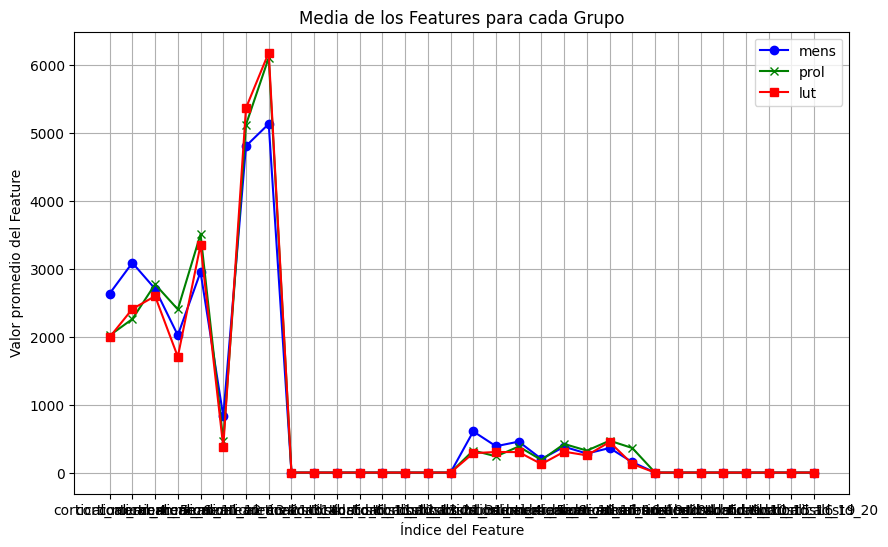

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1n = np.mean(grupo_1n, axis=0)
media_grupo_2n = np.mean(grupo_2n, axis=0)
media_grupo_3n = np.mean(grupo_3n, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1n, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2n, marker='x', label='prol', color='green')
plt.plot(media_grupo_3n, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

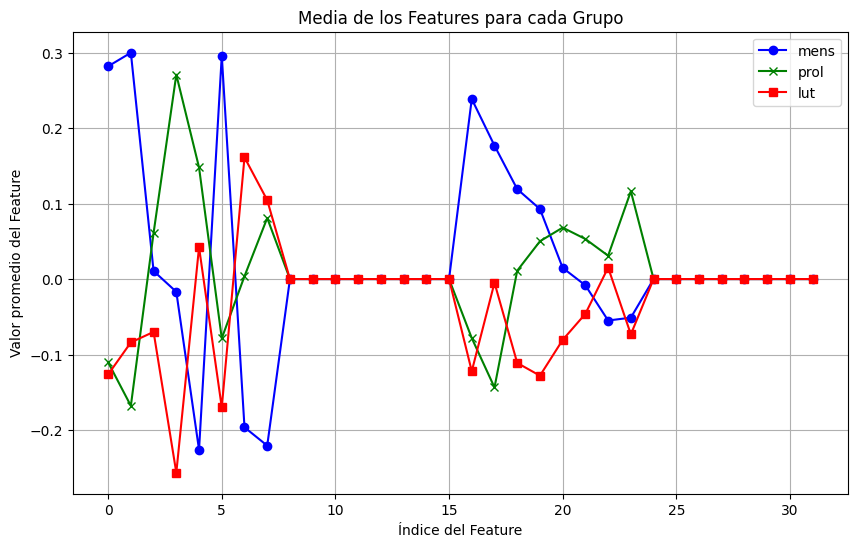

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



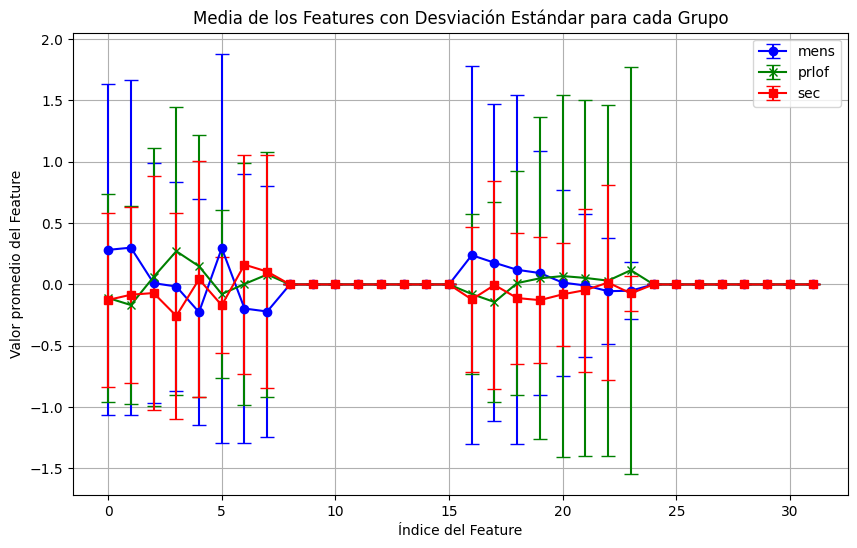

In [13]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='sec', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


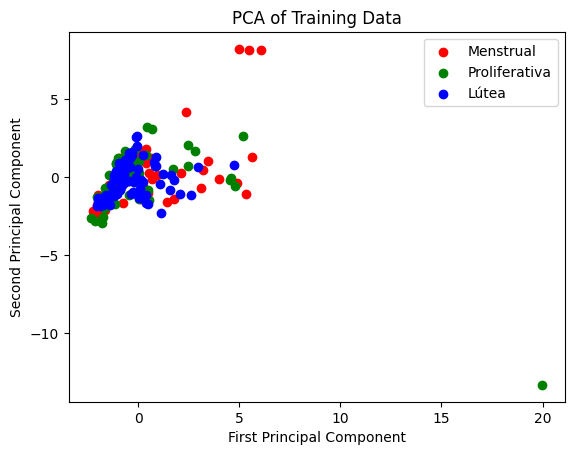

In [ ]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [ ]:
# este es para buscar los mejores parámetros para el svm.

from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Inicializar el modelo GridSearchCV con SVC
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)

# Entrenar el modelo con los datos originales (X_train_scaled)
grid.fit(X_train_scaled, y_train)

# Entrenar el modelo con los datos PCA (X_pca)
grid_pca = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid_pca.fit(X_pca, y_train)

# Mostrar los mejores parámetros y puntajes para cada caso
print("Mejores hiperparámetros (X_train_scaled):", grid.best_params_)
print("Mejor puntaje (X_train_scaled):", grid.best_score_)

print("Mejores hiperparámetros (X_pca):", grid_pca.best_params_)
print("Mejor puntaje (X_pca):", grid_pca.best_score_)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

In [ ]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [ ]:
metrics.accuracy_score(y_test, y_predict)

0.463768115942029

In [ ]:
y_predict2 = grid.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_test, y_predict2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.37681159420289856


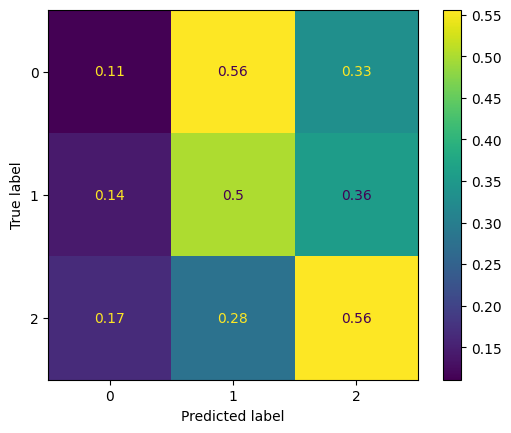

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

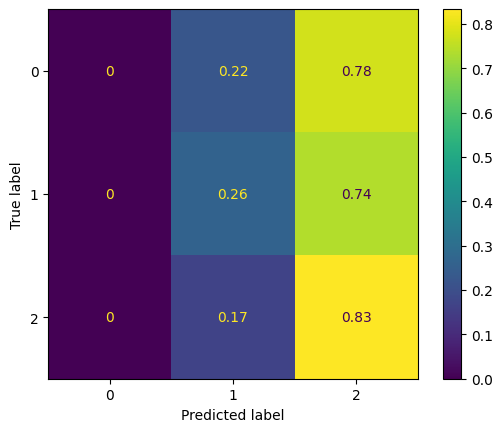

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4927536231884058


In [ ]:
y_pred2 = grid_pca.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.37681159420289856


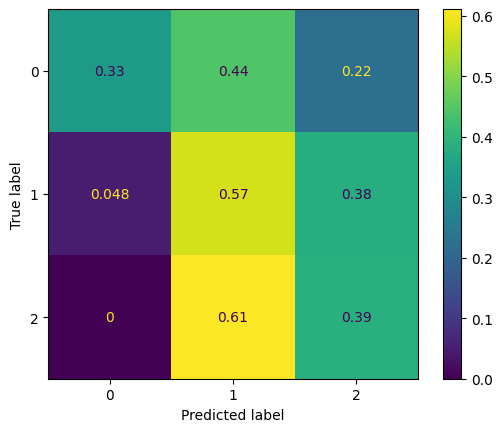

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

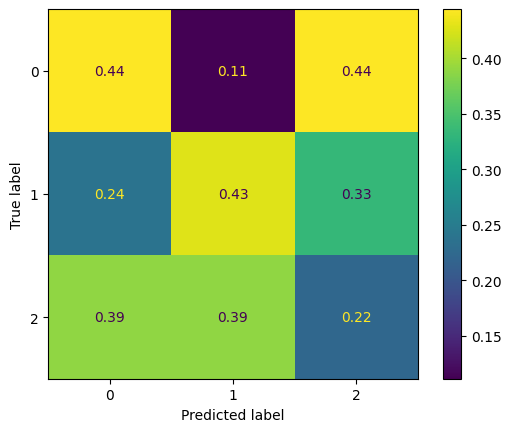

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

Ojo, puede que cross validation esté muy sobreajustado por estar usando a los mismos sujetos, quizá es mejor hacer los folds a mano

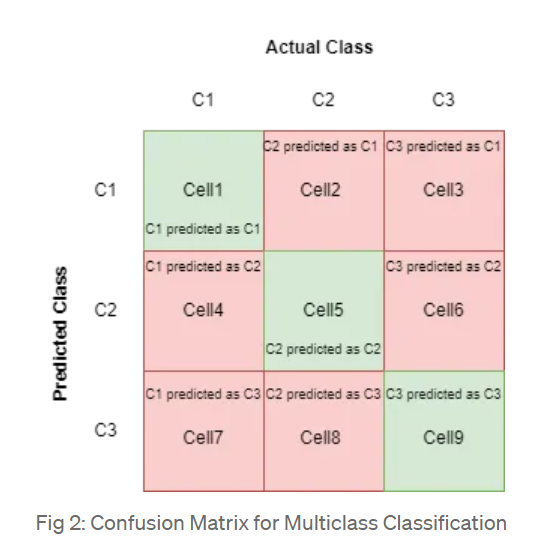

In [ ]:
# Para hacer cross-validation:
from sklearn.model_selection import GroupKFold
import numpy as np

# Número total de grupos
n_groups = X.shape[0]/3

# Crear el array repitiendo cada número 3 veces
groups = np.repeat(np.arange(n_groups), 3) # ponemos aquí nuestros 200 sujetos

#
# Para que esto funcione debo definir X e y al inicio  !!!!!!!!!!!!!!!
#

# Definir GroupKFold
gkf = GroupKFold(n_splits=3) # número de folds

In [ ]:
print(X, y)

     cortical_mean_4  cortical_mean_5  cortical_mean_6  cortical_mean_11  \
0          2597.7869        2745.4820        1826.5015         1908.8273   
1          4765.5713        5140.6973        2126.4130         1070.3699   
2          2418.3428        2554.5774        1590.2275         1734.1410   
3          1149.4143        1543.0701        2652.4353         2070.3354   
4          1922.5050        3054.1530        2957.5588         3478.0027   
..               ...              ...              ...               ...   
277        1596.6963        2358.6821        1424.8414         2898.7913   
278        2662.7715        1641.9869         733.2691         6357.9233   
279        3544.3635        3116.2168        1438.7532         1728.3215   
280        2503.5747        3193.0007        1580.2572         2029.6420   
281        3364.7180        3936.9185        1869.7218         1727.5763   

     cortical_mean_12  cortical_mean_13  cortical_mean_21  cortical_mean_31  \
0       

              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.64      0.93      0.76        42
           2       0.00      0.00      0.00        18

    accuracy                           0.61        69
   macro avg       0.36      0.42      0.38        69
weighted avg       0.45      0.61      0.51        69

              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.66      0.90      0.76        42
           2       0.57      0.22      0.32        18

    accuracy                           0.65        69
   macro avg       0.66      0.49      0.51        69
weighted avg       0.65      0.65      0.61        69

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.66      0.69      0.67        42
           2       0.42      0.44      0.43        18

    accuracy        

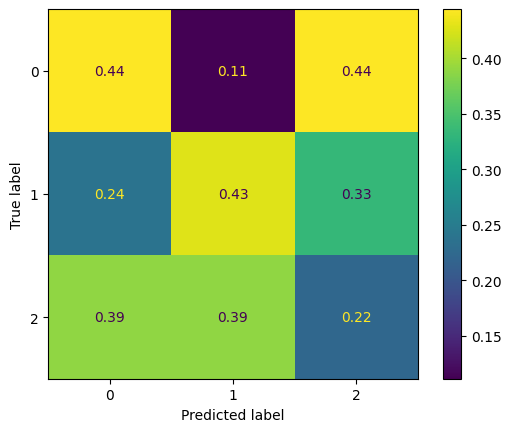

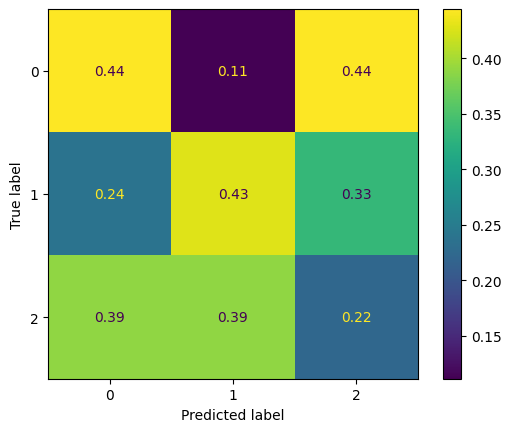

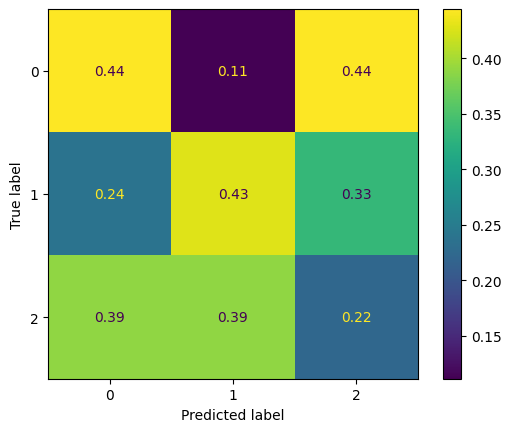

In [ ]:
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba
    X_train2, X_test2 = X.loc[train_idx], X.loc[test_idx]
    y_train2, y_test2 = y.loc[train_idx], y.loc[test_idx]
    classif.fit(X_train2, y_train2)
    y_pred = classif.predict(X_test)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Random Forest:

Probaremos ahora con otro modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest.predict(X_test)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.43478260869565216
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.56      0.36         9
           1       0.75      0.43      0.55        42
           2       0.27      0.39      0.32        18

    accuracy                           0.43        69
   macro avg       0.43      0.46      0.41        69
weighted avg       0.56      0.43      0.46        69



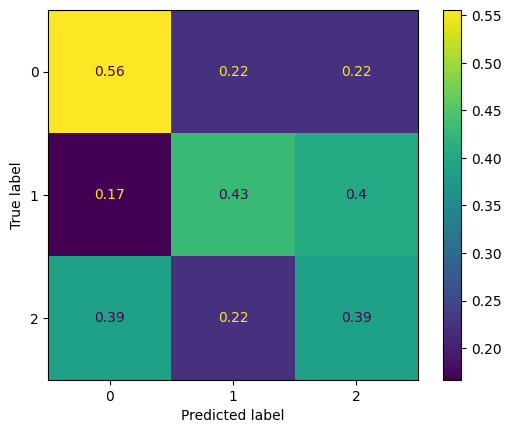

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

                Feature  Importance
3      cortical_mean_11    0.082781
4      cortical_mean_12    0.067887
21  subcortical_mean_16    0.067161
2       cortical_mean_6    0.065122
5      cortical_mean_13    0.064764
6      cortical_mean_21    0.064499
20  subcortical_mean_15    0.064331
1       cortical_mean_5    0.061921
7      cortical_mean_31    0.060908
22  subcortical_mean_19    0.060544


In [ ]:
# data escalada
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest.predict(X_test_scaled)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.43478260869565216
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.56      0.36         9
           1       0.75      0.43      0.55        42
           2       0.27      0.39      0.32        18

    accuracy                           0.43        69
   macro avg       0.43      0.46      0.41        69
weighted avg       0.56      0.43      0.46        69



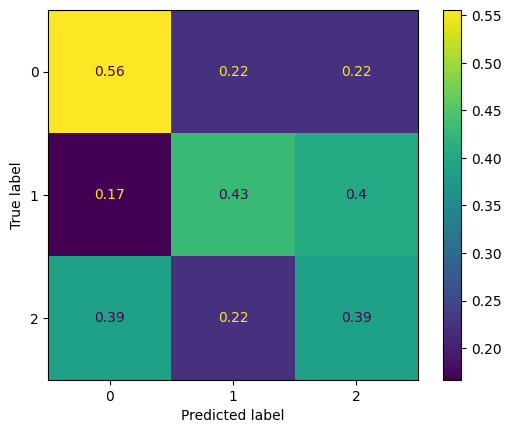

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# pca
X_test_pca = pca.transform(X_test_scaled)
random_forest.fit(X_pca, y_train)

y_pred_p = random_forest.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred_p)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4492753623188406


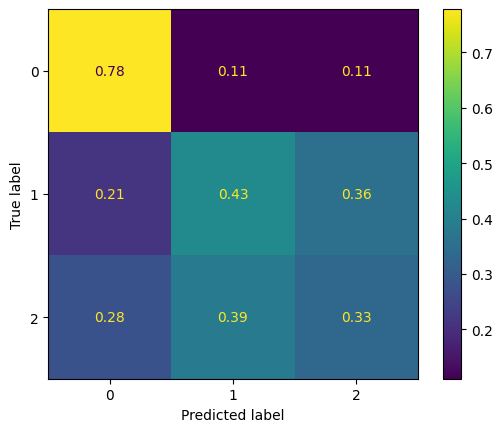

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_p, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convertir las etiquetas a one-hot encoding (ya que son 3 clases)
y_onehot = to_categorical(y_encoded)

# Dividir en sets de entrenamiento y prueba (X_train, X_test, y_train, y_test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled1, y_train1, epochs=50, batch_size=16, validation_data=(X_test_scaled1, y_test1))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled1, y_test1)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3538 - loss: 1.1900 - val_accuracy: 0.4035 - val_loss: 1.0815
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5084 - loss: 1.0593 - val_accuracy: 0.3860 - val_loss: 1.0803
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4803 - loss: 1.0273 - val_accuracy: 0.4035 - val_loss: 1.0664
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5634 - loss: 0.9966 - val_accuracy: 0.4561 - val_loss: 1.0613
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5824 - loss: 0.9806 - val_accuracy: 0.4737 - val_loss: 1.0531
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5877 - loss: 0.9770 - val_accuracy: 0.4912 - val_loss: 1.0446
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5895 - loss: 0.9468 - val_accuracy: 0.4912 - val_loss: 1.0483
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5988 - loss: 0.9109 - val_accuracy: 0.4561 - v

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Matriz de confusión:
[[ 4  4  6]
 [ 3 11  6]
 [ 4  6 13]]


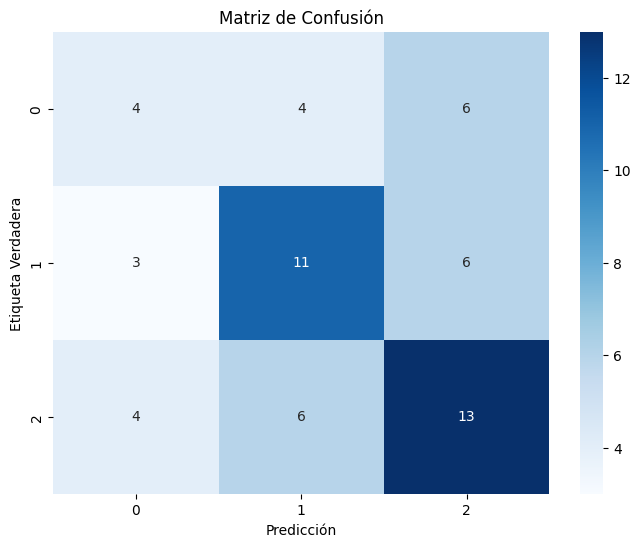

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled1)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_test1, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [ ]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test = encoder.fit_transform(y_test)
y_encoded_train = encoder.fit_transform(y_train)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_onehot_test = to_categorical(y_encoded_test)
y_onehot_train = to_categorical(y_encoded_train)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_onehot_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_onehot_test))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.3782 - loss: 1.0976 - val_accuracy: 0.4493 - val_loss: 1.0292
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4937 - loss: 1.0348 - val_accuracy: 0.4783 - val_loss: 1.0189
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5204 - loss: 1.0129 - val_accuracy: 0.5797 - val_loss: 1.0013
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5249 - loss: 0.9919 - val_accuracy: 0.5652 - val_loss: 1.0068
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5474 - loss: 0.9785 - val_accuracy: 0.5362 - val_loss: 1.0174
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5285 - loss: 0.9537 - val_accuracy: 0.4783 - val_loss: 1.0334
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5578 - loss: 0.9420 - val_accuracy: 0.4928 - val_loss: 1.0296
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6133 - loss: 0.9058 - val_accuracy: 0.4783 - val_loss: 1.04

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de confusión:
[[ 3  3  3]
 [11 14 17]
 [ 3  5 10]]


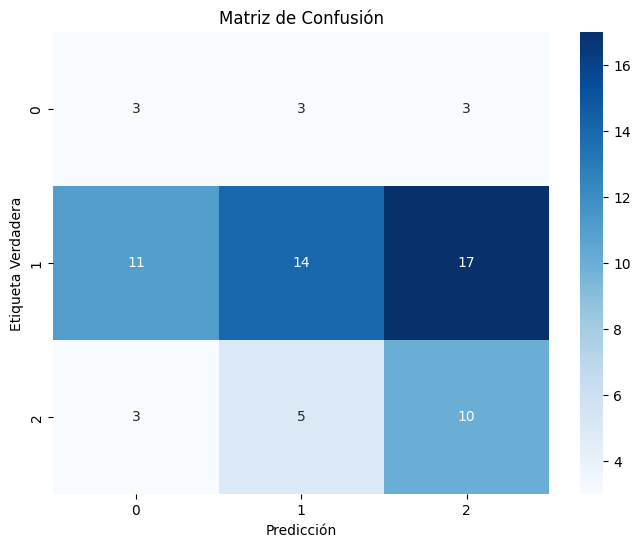

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo de red neuronal con capas adicionales
model = Sequential()

# Capa de entrada
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Capas ocultas adicionales
model.add(Dense(64, activation='relu'))  # Nueva capa oculta
model.add(Dense(32, activation='relu'))  # Nueva capa oculta
model.add(Dense(32, activation='relu'))  # Nueva capa oculta

# Capa oculta original
model.add(Dense(32, activation='relu'))

# Capa de salida (tres clases)
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_onehot_train,
    epochs=50, batch_size=16,
    validation_data=(X_test_scaled, y_onehot_test)
)

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3761 - loss: 1.1023 - val_accuracy: 0.4783 - val_loss: 1.0963
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4444 - loss: 1.0628 - val_accuracy: 0.4928 - val_loss: 1.0763
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5163 - loss: 1.0493 - val_accuracy: 0.4783 - val_loss: 1.0974
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5630 - loss: 1.0195 - val_accuracy: 0.4928 - val_loss: 1.0897
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5729 - loss: 0.9774 - val_accuracy: 0.4928 - val_loss: 1.1123
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5459 - loss: 0.9382 - val_accuracy: 0.4493 - val_loss: 1.1474
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6445 - loss: 0.8801 - val_accuracy: 0.4203 - val_loss: 1.1828
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5745 - loss: 0.9143 - val_accuracy: 0.4348 - val_loss

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de confusión:
[[ 5  1  3]
 [17 11 14]
 [ 6  5  7]]


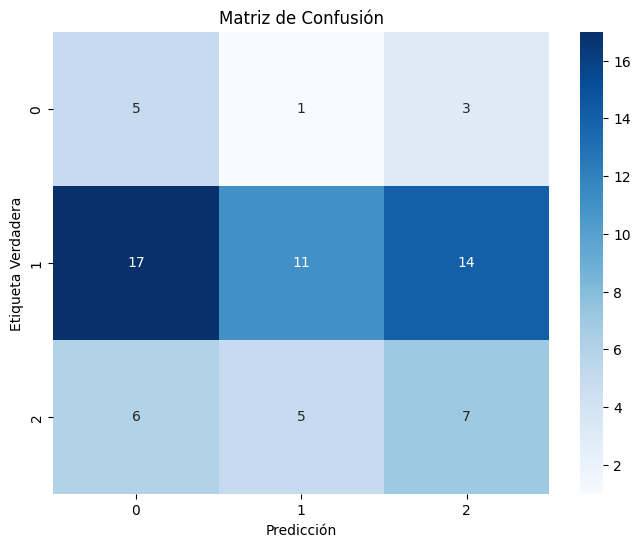

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

## Menos grupos

In [ ]:
men = 12*3
prlof = 12*3 #int(len(data_pr)*0.7)
lut = 20*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train2 = data_men.iloc[:men]
data_pro_train2 = data_pr.iloc[:prlof]
data_lut_train2 = data_lut.iloc[:lut]

data_men_test2 = data_men.iloc[men:]
data_pro_test2 = data_pr.iloc[prlof:]
data_lut_test2 = data_lut.iloc[lut:]

data_pro_train2 = data_pro_train2.drop(columns=['group'])
data_lut_train2 = data_lut_train2.drop(columns=['group'])
data_pro_train2['group'] = '0'
data_lut_train2['group'] = '1'

data_pro_test2 = data_pro_test2.drop(columns=['group'])
data_lut_test2 = data_lut_test2.drop(columns=['group'])
data_pro_test2['group'] = '0'
data_lut_test2['group'] = '1'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train2 = pd.concat([data_men_train2, data_pro_train2, data_lut_train2], ignore_index=True)
df_all_test2 = pd.concat([data_men_test2, data_pro_test2, data_lut_test2], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train2 = df_all_train2.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train2 = df_all_train2['group']  # Esta será nuestra etiqueta


X_test2 = df_all_test2.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test2 = df_all_test2['group']  # Esta será nuestra etiqueta



In [ ]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train2 = y_train2.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled2 = pd.DataFrame(X_train_scaled2)
X_test_scaled2 = scaler.transform(X_test2)


In [ ]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled2, y_train2)
y_predict2 = classifier.predict(X_test_scaled2)

In [ ]:
metrics.accuracy_score(y_test2, y_predict2)

0.5333333333333333

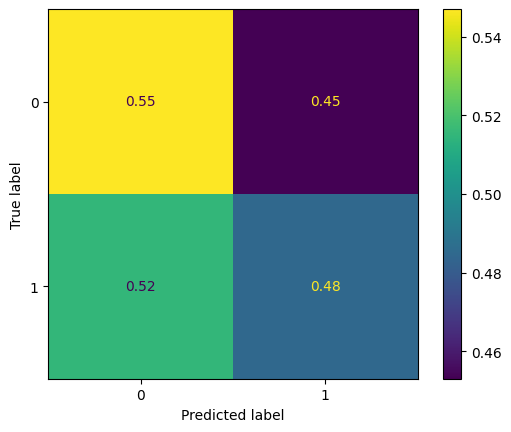

In [ ]:
conf_mat = metrics.confusion_matrix(y_test2, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred2 = random_forest.predict(X_test2)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Classification Report:\n", classification_report(y_test2, y_pred2))

Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.58      0.68       117
           1       0.28      0.58      0.38        33

    accuracy                           0.58       150
   macro avg       0.55      0.58      0.53       150
weighted avg       0.71      0.58      0.62       150



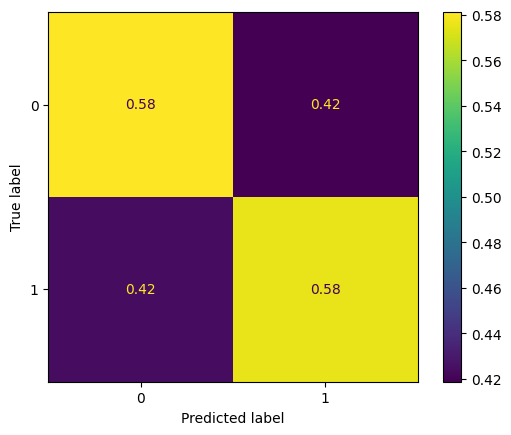

In [ ]:
conf_mat = metrics.confusion_matrix(y_test2, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test2 = encoder.fit_transform(y_test2)
y_encoded_train2 = encoder.fit_transform(y_train2)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

y_onehot_test2 = to_categorical(y_encoded_test2)
y_onehot_train2 = to_categorical(y_encoded_train2)

print(y_onehot_test2)
print(y_onehot_train2)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [ ]:

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled2.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(2, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled2, y_onehot_train2, epochs=50, batch_size=16, validation_data=(X_test_scaled2, y_onehot_test2))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled2, y_onehot_test2)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 132
'y' sizes: 120


In [ ]:
# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled2)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test2, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


ValueError: Found input variables with inconsistent numbers of samples: [162, 150]